In [1]:
# Library import
import pandas as pd
import numpy as np

# 1) Load the dataset and explore the variables.

In [2]:
# Data import
cchurn = pd.read_csv('customer_churn.csv')

cchurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Column Check
list(cchurn.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [4]:
# Cleaning column heads
cchurn.columns = cchurn.columns.str.lower()

cchurn.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2) We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [5]:
# Create df with seniorcitizen, monthlycharges, tenure and Churn columns
data1 = cchurn[['seniorcitizen', 'monthlycharges', 'tenure', 'churn']]

data1.head()

,seniorcitizen,monthlycharges,tenure,churn
0,0,29.85,1,No
1,0,56.95,34,No
2,0,53.85,2,Yes
3,0,42.30,45,No
4,0,70.70,2,Yes


In [6]:
# Information on data1 df
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seniorcitizen   7043 non-null   int64  
 1   monthlycharges  7043 non-null   float64
 2   tenure          7043 non-null   int64  
 3   churn           7043 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 220.2+ KB


- No Nulls
- 3 numerical columns and 1 categorical (our independent variable)


## 3) Extract the target variable.

In [7]:
# Checking for values under 'churn'
data1['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

- Check why dtype shows up as object info but as int64 in value_counts

In [8]:
# Create df 'cat' for independent varaible
cat = data1.select_dtypes(include = ['object'])

cat.head()

,churn
0,No
1,No
2,Yes
3,No
4,Yes


In [9]:
# Manual dummify of the cat/churn column ('Yes' = 1 / 'No' = 0)
cat['churn'] = cat['churn'].replace(['Yes','No'], [1,0])

cat.head()

<ipython-input-9-493accfd261a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat['churn'] = cat['churn'].replace(['Yes','No'], [1,0])


,churn
0,0
1,0
2,1
3,0
4,1


# 4) Extract the independent variables and scale them.


In [10]:
# Import relevant libraries
from sklearn.preprocessing import StandardScaler

In [11]:
# creating df 'nums' for numericals
nums = data1.select_dtypes(include = ['int64', 'float64'])

nums.head()

,seniorcitizen,monthlycharges,tenure
0,0,29.85,1
1,0,56.95,34
2,0,53.85,2
3,0,42.30,45
4,0,70.70,2


In [12]:
# Scaling numericals
scaler = StandardScaler()
scaler.fit(nums)
nums = scaler.transform(nums)

nums

array([[-0.43991649, -1.16032292, -1.27744458],
       [-0.43991649, -0.25962894,  0.06632742],
       [-0.43991649, -0.36266036, -1.23672422],
       ...,
       [-0.43991649, -1.1686319 , -0.87024095],
       [ 2.27315869,  0.32033821, -1.15528349],
       [-0.43991649,  1.35896134,  1.36937906]])

In [13]:
#Converting back to dataframe
numsconv = pd.DataFrame(nums)

numsconv.head()

,0,1,2
0,-0.439916,-1.160323,-1.277445
1,-0.439916,-0.259629,0.066327
2,-0.439916,-0.362660,-1.236724
3,-0.439916,-0.746535,0.514251
4,-0.439916,0.197365,-1.236724


In [53]:
# Replacing column names

numsconv = numsconv.rename(columns = {0:'seniorcitizen', 1:'monthlycharges', 2:'tenure'})

numsconv.head()

,seniorcitizen,monthlycharges,tenure
0,-0.439916,-1.160323,-1.277445
1,-0.439916,-0.259629,0.066327
2,-0.439916,-0.362660,-1.236724
3,-0.439916,-0.746535,0.514251
4,-0.439916,0.197365,-1.236724


In [15]:
# dropping index from cat category
cat.reset_index(drop=True)

,churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


# 5) Build the logistic regression model.


In [16]:
# Imporiting tranin_test_split and LogisticRegression Library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [62]:
# X - Y split
X = numsconv
y = cat

In [63]:
# Using train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [64]:
# Logisitc Model
clf = LogisticRegression(random_state = 100, max_iter = 500).fit(X_train, y_train)
predictions = clf.predict(X_test)

C:\Users\sogun\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# 6) Evaluate the model

In [65]:
# Import relevant libraries
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score
from scipy.stats import normaltest
from sklearn.metrics import cohen_kappa_score


The Kappa of your model is: 0.39
The accuracy score of the model is: 0.78


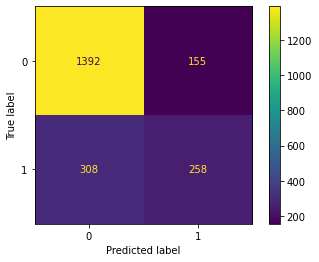

In [66]:
# Confusion Matrix and Accuracy Score
plot_confusion_matrix(clf, X_test, y_test) 
print()
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print("The accuracy score of the model is: %4.2f" % (clf.score(X_test, y_test)))

# 7) Even a simple model will give us more than 70% accuracy. Why?

- We usually use 70% for testing the data and 30% for training the classfication test. If there is an imbalance on the score, that will mean majority of one value will be found in the 70% testing data. 

# 8) Synthetic Minority Oversampling TEchnique (SMOTE)  Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. 

In [67]:
# Import SMOTE library
from imblearn.over_sampling import SMOTE
smote = SMOTE()

X_sm, y_sm = smote.fit_sample(X, y)
y_sm = pd.DataFrame(data=y_sm.values.flatten())

y_sm[0].value_counts()

1    5174
0    5174
Name: 0, dtype: int64

In [68]:
# Train split on SMOTE varaibles
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

In [69]:
# Running Logistic Regression again with SMOTE variables
clfsm = LogisticRegression(random_state = 100, max_iter = 500).fit(X_sm_train, y_sm_train)
predictionssm = clfsm.predict(X_sm_test)

C:\Users\sogun\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



The Kappa of your model is: 0.47
The accuracy score of the model is: 0.74


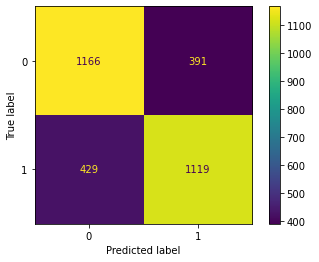

In [71]:
# Confusion Matrix and Accuracy Score
plot_confusion_matrix(clfsm, X_sm_test, y_sm_test) 
print()
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_sm_test, predictionssm)))
print("The accuracy score of the model is: %4.2f" % (clfsm.score(X_sm_test, y_sm_test)))

- Both Kappa score (0.47) and accuracy score (0.74) improved on SMOTE method

# 9) Tomek links - apply imblearn.under_sampling.TomekLinks to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [77]:
# Import relevant libraries
from imblearn.under_sampling import TomekLinks

TL = TomekLinks('majority')
X_TL, y_TL = TL.fit_sample(X, y)
y_TL = pd.DataFrame(data = y_TL.values.flatten())

y_TL[0].value_counts()

C:\Users\sogun\anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


0    4694
1    1869
Name: 0, dtype: int64

In [78]:
# Train split on TomekLink varaibles 
X_TL_train, X_TL_test, y_TL_train, y_TL_test = train_test_split(X_TL, y_TL, test_size=0.3, random_state=100)

In [79]:
# Running Logistic Regression again with TomekLinks variables
clfTL = LogisticRegression(random_state = 100, max_iter = 500).fit(X_TL_train, y_TL_train)
predictionsTL = clfTL.predict(X_TL_test)

C:\Users\sogun\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



The Kappa of your model is: 0.45
The accuracy score of the model is: 0.79


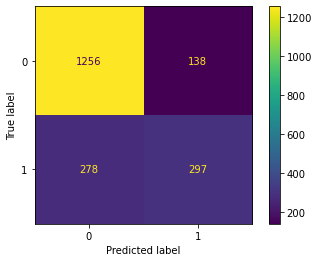

In [80]:
# Confusion Matrix and Accuracy Score
plot_confusion_matrix(clfTL, X_TL_test, y_TL_test) 
print()
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_TL_test, predictionsTL)))
print("The accuracy score of the model is: %4.2f" % (clfTL.score(X_TL_test, y_TL_test)))

Slight increase in Kappa (0.45) and accuracy (0.79) compared to original logistic regression model. Arounnd the same score as the SMOTE analysis as well.